In [114]:
# Choose the directory for annotations
import json
import os

annotation_set = "describe-bird-attributes-night2"



In [115]:
# Create list of all birds and their individual annotations
# Structure: Nested dictionaries. key = Bird ID. Dictionary
# contains bird name and annotations
'''
{
    BirdID: {
        Bird Filename
        Labels []
    }
}
'''
annotations_dir = annotation_set + "/annotations/consolidated-annotation/consolidation-request/iteration-1/"

directory = os.fsencode(annotations_dir)
bird_annotations = {}

for file in os.listdir(directory):
    filename = annotations_dir + os.fsdecode(file)
    with open(filename, "r") as f:
        data = json.load(f)
    f.close()
    
    for bird in data:
        bird_annotations[bird["datasetObjectId"]] = {}

        curr_labels = {}
        #32 = where file name starts
        curr_labels["bird_filename"] = bird["dataObject"]["s3Uri"][32:] 
        curr_labels["labels"] = []

        for annotation in bird["annotations"]:
            # 36 = where label starts. -3 = cut off the last extra characters ("}})
            curr_labels["labels"].append(annotation["annotationData"]["content"][36:-3]) 

        bird_annotations[bird["datasetObjectId"]] = curr_labels


In [116]:
# Add confidence score and aggregate label
annotations_dir = annotation_set + "/annotations/consolidated-annotation/consolidation-response/iteration-1/"

directory = os.fsencode(annotations_dir)
for file in os.listdir(directory):
    filename = annotations_dir + os.fsdecode(file)
    with open(filename, "r") as f:
        data = json.load(f)
    f.close()
    
    for bird in data:
        bird_annotations[bird["datasetObjectId"]]["aggregated_label"] = bird["consolidatedAnnotation"]["content"][annotation_set + "-metadata"]["class-name"]
        bird_annotations[bird["datasetObjectId"]]["confidence"] = bird["consolidatedAnnotation"]["content"][annotation_set + "-metadata"]["confidence"]

In [117]:
# Add average time per annotation
annotations_dir = annotation_set + "/annotations/worker-response/iteration-1/"

time_spent = []
for bird_id in os.listdir(annotations_dir):
    bird_path = annotations_dir + bird_id + "/"
    for file in os.listdir(bird_path):       
        filename = bird_path + os.fsdecode(file)
        with open(filename, "r") as f:
            data = json.load(f)
        f.close()
        
        sum = 0
        count = 0
        for answer in data["answers"]:
            time_spent.append(answer["timeSpentInSeconds"])
            sum += answer["timeSpentInSeconds"]
            count += 1.0
        
        bird_annotations[bird_id]["avg_time"] = sum / count
print(time_spent)

[11.0, 6.0, 40.0, 42.0, 116.0, 32.0, 6.0, 48.0, 54.0, 45.0, 9.0, 39.0, 11.0, 42.0, 112.0, 22.0, 10.0, 34.0, 77.0, 99.0, 23.0, 21.0, 19.0, 60.0, 24.0, 8.0, 26.0, 81.0, 91.0, 15.0, 20.0, 62.0, 42.0, 37.0, 104.0, 32.0, 18.0, 96.0, 53.0, 102.0, 39.0, 9.0, 13.0, 13.0, 56.0, 25.0, 10.0, 45.0, 13.0, 67.0, 8.0, 10.0, 15.0, 45.0, 117.0, 40.0, 36.0, 8.0, 39.0, 45.0, 10.0, 20.0, 110.0, 70.0, 91.0, 11.0, 79.0, 47.0, 99.0, 51.0, 14.0, 27.0, 45.0, 87.0, 17.0, 40.0, 60.0, 47.0, 21.0, 29.0, 24.0, 11.0, 19.0, 23.0, 23.0, 6.0, 40.0, 76.0, 91.0, 68.0, 7.0, 11.0, 25.0, 71.0, 47.0, 9.0, 61.0, 34.0, 18.0, 105.0, 57.0, 25.0, 32.0, 23.0, 108.0, 35.0, 12.0, 22.0, 16.0, 57.0, 15.0, 9.0, 32.0, 28.0, 9.0, 24.0, 63.0, 25.0, 73.0, 117.0, 6.0, 7.0, 53.0, 100.0, 72.0, 25.0, 59.0, 108.0, 66.0, 113.0, 9.0, 20.0, 9.0, 22.0, 24.0, 55.0, 17.0, 36.0, 64.0, 75.0, 53.0, 64.0, 27.0, 101.0, 29.0, 42.0, 16.0, 58.0, 49.0, 115.0, 44.0, 68.0, 60.0, 74.0, 93.0, 35.0, 25.0, 99.0, 80.0, 23.0, 22.0, 99.0, 57.0, 22.0, 16.0, 21.0, 49.0,

In [118]:
# View the bird annotations in numerical order
from natsort import natsorted
dict(natsorted(bird_annotations.items()))

{'0': {'bird_filename': 'American_Goldfinch_0022_32111.jpg',
  'labels': ['Striped', 'Striped', 'Multi-Colored', 'Solid', 'Striped'],
  'aggregated_label': 'Striped',
  'confidence': 0.95,
  'avg_time': 43.0},
 '1': {'bird_filename': 'American_Goldfinch_0084_32295.jpg',
  'labels': ['Spotted', 'Striped', 'Spotted', 'Multi-Colored', 'Spotted'],
  'aggregated_label': 'Spotted',
  'confidence': 0.95,
  'avg_time': 37.0},
 '2': {'bird_filename': 'American_Goldfinch_0086_31887.jpg',
  'labels': ['Multi-Colored',
   'Multi-Colored',
   'Multi-Colored',
   'Multi-Colored',
   'Multi-Colored'],
  'aggregated_label': 'Multi-Colored',
  'confidence': 0.95,
  'avg_time': 60.2},
 '3': {'bird_filename': 'Blue_Grosbeak_0024_36680.jpg',
  'labels': ['Striped', 'Striped', 'Multi-Colored', 'Striped', 'Spotted'],
  'aggregated_label': 'Striped',
  'confidence': 0.95,
  'avg_time': 60.4},
 '4': {'bird_filename': 'Blue_Grosbeak_0066_36632.jpg',
  'labels': ['Spotted', 'Striped', 'Multi-Colored', 'Spotted'

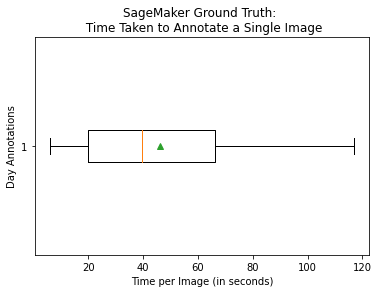

In [119]:
# Adding box and whisker plot for Sagemaker annotations
import matplotlib.pyplot as plt
plt.boxplot(time_spent, vert=False, showmeans=True,)
plt.title("SageMaker Ground Truth: \n Time Taken to Annotate a Single Image")
plt.xlabel("Time per Image (in seconds)")
plt.ylabel("Night Annotations")

plt.show()